<a href="https://colab.research.google.com/github/Locung201/Group3_PTDLUD_HCMUS_2425/blob/main/Gd1_Data_Preparation_%2B_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="background-color: #D3D3D3; font-weight: bold;">Giai đoạn 1: Chuẩn bị Dữ liệu (Data Preparation) + Data Preprocessing</span>


<style>
    body {
        margin: 0;
        font-family: Arial, sans-serif;
    }
    h2 {
        color: #4CAF50;
        text-align: center;
        font-size: 26px;
    }
    table {
        width: 80%;
        margin: 50px auto; /* Căn giữa bảng */
        border-collapse: collapse;
        font-size: 20px;
    }
    th, td {
        border: 1px solid #dddddd;
        text-align: center;
        padding: 15px;
    }
    th {
        background-color: #4CAF50;
        color: white;
        font-size: 22px;
    }
    tr:nth-child(even) {
        background-color: #f9f9f9;
    }
    tr:nth-child(odd) {
        background-color: #ffffff;
    }
    .icon {
        color: #4CAF50;
        font-size: 22px;
        margin-right: 8px;
    }
    a {
        text-decoration: none;
        color: #4CAF50;
    }
</style>

<h2>Nhóm 3 - CSC12110 - PTDLUD</h2>

<table>
    <tr>
        <th>MSSV</th>
        <th>Họ Tên</th>
        <th>Email</th>
    </tr>
    <tr>
        <td>18127008</td>
        <td><i class="icon">👨‍💻</i> Lê Mạnh Hoàng</td>
        <td><a href="mailto:lmhoang18@clc.fitus.edu.vn">lmhoang18@clc.fitus.edu.vn</a></td>
    </tr>
    <tr>
        <td>21127211</td>
        <td><i class="icon">👩‍💻</i> Nguyễn Vũ Tường An</td>
        <td><a href="mailto:nvtan21@clc.fitus.edu.vn">nvtan21@clc.fitus.edu.vn</a></td>
    </tr>
    <tr>
        <td>21127699</td>
        <td><i class="icon">👩‍💻</i> Lô Thủy Tiên</td>
        <td><a href="mailto:lttien21@clc.fitus.edu.vn">lttien21@clc.fitus.edu.vn</a></td>
    </tr>
</table>


## <span style="background-color: #D3D3D3; font-weight: bold;">1. Tải dữ liệu từ nguồn cung cấp</span>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.preprocessing import LabelEncoder


# Chọn file CSV trên máy tính
# Thay đường dẫn này bằng đường dẫn đến file

# Đọc dữ liệu từ file CSV
data = pd.read_csv("2425_QC.csv", index_col=0)

# Hiển thị vài dòng đầu tiên của dữ liệu
print("Some top rows of the data:")
data.head()

Some top rows of the data:


,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
Daily Time Spent on Site,,,,,,,,,
68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/3/2016 0:53,0
80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/3/2016 20:35,0
74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/1/2016 2:31,0
68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/6/2016 3:36,0


## <span style="background-color: #D3D3D3; font-weight: bold;">2. Kiểm tra cấu trúc dữ liệu</span>

In [8]:
print("Number of rows and columns in the data:", data.shape)

print("\nInformation about the data structure:")
data.info()

print("\nNames of the attributes in the dataset:", data.columns)

Number of rows and columns in the data: (1002, 9)

Information about the data structure:
<class 'pandas.core.frame.DataFrame'>
Index: 1002 entries, 68.95 to 36.91
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1001 non-null   float64
 1   Area Income           1002 non-null   float64
 2   Daily Internet Usage  1002 non-null   float64
 3   Ad Topic Line         1002 non-null   object 
 4   City                  1002 non-null   object 
 5   Male                  1002 non-null   int64  
 6   Country               1002 non-null   object 
 7   Timestamp             1002 non-null   object 
 8   Clicked on Ad         1002 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 78.3+ KB

Names of the attributes in the dataset: Index(['Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City',
       'Male', 'Country', 'Timestamp', 'Clicked on Ad'],
     

<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Nhận xét về Dữ liệu:</strong>
</div>
- **Số dòng và cột**: Dữ liệu có 1002 dòng và 9 cột. Điều này cho thấy dữ liệu có số lượng mẫu khá lớn (1002 mẫu) với 9 thuộc tính.

- **Các cột trong dữ liệu**:
    1. **Age**: Độ tuổi của người dùng, có 1001 giá trị hợp lệ (1 giá trị thiếu). Dữ liệu có kiểu `float64`.
    2. **Area Income**: Thu nhập khu vực của người dùng, không có giá trị thiếu và có kiểu `float64`.
    3. **Daily Internet Usage**: Sử dụng internet hàng ngày của người dùng, không có giá trị thiếu và có kiểu `float64`.
    4. **Ad Topic Line**: Dòng quảng cáo mà người dùng đã tương tác, không có giá trị thiếu và có kiểu `object` (chuỗi).
    5. **City**: Thành phố của người dùng, không có giá trị thiếu và có kiểu `object` (chuỗi).
    6. **Male**: Giới tính của người dùng (0 cho nữ, 1 cho nam), không có giá trị thiếu và có kiểu `int64`.
    7. **Country**: Quốc gia của người dùng, không có giá trị thiếu và có kiểu `object` (chuỗi).
    8. **Timestamp**: Thời gian người dùng tương tác với quảng cáo, không có giá trị thiếu và có kiểu `object` (chuỗi). Cần chuyển đổi sang kiểu dữ liệu thời gian (`datetime`) để dễ dàng xử lý và phân tích.
    9. **Clicked on Ad**: Biến mục tiêu cho bài toán phân loại, cho biết người dùng có nhấp vào quảng cáo hay không (0 hoặc 1), không có giá trị thiếu và có kiểu `int64`.

- **Nhận xét**:
    - Dữ liệu có đầy đủ thông tin cần thiết, với một số giá trị thiếu trong cột `Age` (1 giá trị thiếu).
    - Các cột có kiểu dữ liệu hợp lý, nhưng cột `Timestamp` cần chuyển đổi thành kiểu `datetime` để thuận tiện cho việc phân tích theo thời gian.
    - Các thuộc tính như độ tuổi, thu nhập khu vực, và mức độ sử dụng internet có thể đóng vai trò quan trọng trong việc phân tích.
    - Biến mục tiêu `Clicked on Ad` là một biến nhị phân, và dữ liệu này sẽ được sử dụng để xây dựng mô hình phân loại.


# <span style="background-color: #D3D3D3; font-weight: bold;">II.Khám phá và tiền xử lý dữ liệu (Data Preprocessing)</span>


## <span style="background-color: #D3D3D3; font-weight: bold;">1. Handling Missing Value & Empty Data:</span>


Mô tả số lượng missing value của mỗi thuộc tính

In [9]:
# Kiểm tra các giá trị bị thiếu
print("\nMissing Values:")
missing_values = data.isnull().sum()
print(missing_values)


Missing Values:
Age                     1
Area Income             0
Daily Internet Usage    0
Ad Topic Line           0
City                    0
Male                    0
Country                 0
Timestamp               0
Clicked on Ad           0
dtype: int64


<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Nhận xét:</strong>
</div>

<p style="font-size: 16px; color: #555555;">
Chỉ có 1 giá trị bị thiếu trong cột Age.
</p>

 Xử lý dữ liệu missing : Việc điền giá trị thiếu trong cột "Age" bằng giá trị trung vị giúp đảm bảo rằng dữ liệu không bị thiên lệch do giá trị ngoại lệ và vẫn duy trì tính chính xác cho các phân tích và mô hình dự đoán tiếp theo.


In [10]:
# Điền giá trị thiếu cho cột 'Age' bằng giá trị trung vị
data['Age'].fillna(data['Age'].median(), inplace=True)

# Kiểm tra lại số lượng giá trị thiếu sau khi điền
print("\nMissing Values After Filling:")
missing_values_after = data.isnull().sum()
print(missing_values_after)


Missing Values After Filling:
Age                     0
Area Income             0
Daily Internet Usage    0
Ad Topic Line           0
City                    0
Male                    0
Country                 0
Timestamp               0
Clicked on Ad           0
dtype: int64


C:\Users\nguye\AppData\Local\Temp\ipykernel_15392\571993896.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Nhận xét:</strong>
</div>

<p style="font-size: 16px; color: #555555;">
Kết quả kiểm tra cho thấy không còn giá trị nào bị thiếu trong tất cả các cột, điều này cho thấy dữ liệu hiện tại đã đầy đủ và sẵn sàng cho các phân tích tiếp theo.
</p>



## <span style="background-color: #D3D3D3; font-weight: bold;">2.Handling Duplications | Errors:</span>


Mô tả số lượng Duplications | Errors

In [11]:
# Kiểm tra các dòng trùng lặp
duplicates = data.duplicated()
print("\nDuplicate rows:")
print(duplicates)


Duplicate rows:
Daily Time Spent on Site
68.95    False
80.23    False
69.47    False
74.15    False
68.37    False
         ...  
51.30    False
51.63    False
55.55    False
45.01    False
36.91     True
Length: 1002, dtype: bool


<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Nhận xét:</strong>
</div>

<p style="font-size: 16px; color: #555555;">
  Dữ liệu cho thấy rằng dòng có giá trị "Daily Time Spent on Site" là <strong>36.91</strong> có bản sao trùng lặp, được đánh dấu là <strong>True</strong>, trong khi các dòng khác đều được đánh dấu là <strong>False</strong>, cho thấy chúng là các giá trị duy nhất.
</p>


Sử dụng phương thức drop_duplicates(keep='first') để giữ lại dòng đầu tiên của các dòng trùng lặp và xóa các dòng còn lại.

In [12]:
# Kiểm tra lại số lượng dòng trong DataFrame trước và sau khi xóa
print("\nNumber of rows before removal:", len(data))

# Giữ lại dòng đầu tiên và xóa các dòng trùng lặp
data = data.drop_duplicates(keep='first')

# Hiển thị thông tin về DataFrame sau khi xóa các dòng trùng lặp
print("\nDataFrame after keeping the first occurrence:")
print(data)
print("Number of rows after removal:", len(data))

print("\nNumber of rows and columns in the data:", data.shape)


Number of rows before removal: 1002

DataFrame after keeping the first occurrence:
                           Age  Area Income  Daily Internet Usage  \
Daily Time Spent on Site                                            
68.95                     35.0     61833.90                256.09   
80.23                     31.0     68441.85                193.77   
69.47                     26.0     59785.94                236.50   
74.15                     29.0     54806.18                245.89   
68.37                     35.0     73889.99                225.58   
...                        ...          ...                   ...   
72.97                     30.0     71384.57                208.58   
51.30                     45.0     67782.17                134.42   
51.63                     51.0     42415.72                120.37   
55.55                     19.0     41920.79                187.95   
45.01                     35.0     29875.80                178.35   

                  

<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Nhận xét:</strong>
</div>

<p style="font-size: 16px; color: #555555;">
  Sau khi loại bỏ các giá trị trùng lặp trong DataFrame, số lượng dòng đã giảm từ 1002 xuống còn 1000, tức là có 2 dòng bị loại bỏ do trùng lặp.
</p>

<p style="font-size: 16px; color: #555555;">
  Điều này cho thấy rằng trong dữ liệu ban đầu có một số bản ghi trùng lặp, và việc loại bỏ các bản sao giúp dữ liệu trở nên chính xác và không bị ảnh hưởng bởi các dòng thừa. Điều này sẽ giúp đảm bảo rằng các phân tích và mô hình dự đoán tiếp theo không bị sai lệch hoặc có sự lặp lại không cần thiết.
</p>


## <span style="background-color: #D3D3D3; font-weight: bold;">3. Incorrect | Invalid Values - Validating Data - Normalizing Data | Errors:</span>
- Normalizing Data
- Validating Data



In [13]:
print("Some top rows of the data:")
data.head()

Some top rows of the data:


,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
Daily Time Spent on Site,,,,,,,,,
68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/3/2016 0:53,0
80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/3/2016 20:35,0
74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/1/2016 2:31,0
68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/6/2016 3:36,0


In [14]:
# 1. Kiểm tra và xử lý ngày không tồn tại
if 'Timestamp' in data.columns:
    # Chuyển đổi 'Timestamp' thành datetime, với các giá trị không hợp lệ sẽ trở thành NaT
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
    # Loại bỏ các dòng có ngày không hợp lệ (NaT)
    data = data[data['Timestamp'].notna()]

# 2. Kiểm tra và xử lý giá trị âm trong dữ liệu số
columns_to_check = ['Age', 'Area Income', 'Daily Internet Usage']  
for col in columns_to_check:
    if col in data.columns:
        # Loại bỏ các dòng có giá trị âm
        data = data[data[col] > 0]

# 3. Thay thế giá trị NaN trong các cột số bằng giá trị trung bình
numeric_columns = ['Age', 'Area Income', 'Daily Internet Usage']
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Hiển thị vài dòng đầu tiên của dữ liệu sau khi chuẩn hóa
print("\nDữ liệu sau khi chuẩn hóa:")
print(data.head())


Dữ liệu sau khi chuẩn hóa:
                           Age  Area Income  Daily Internet Usage  \
Daily Time Spent on Site                                            
68.95                     35.0     61833.90                256.09   
80.23                     31.0     68441.85                193.77   
69.47                     26.0     59785.94                236.50   
74.15                     29.0     54806.18                245.89   
68.37                     35.0     73889.99                225.58   

                                                  Ad Topic Line  \
Daily Time Spent on Site                                          
68.95                        Cloned 5thgeneration orchestration   
80.23                        Monitored national standardization   
69.47                          Organic bottom-line service-desk   
74.15                     Triple-buffered reciprocal time-frame   
68.37                             Robust logistical utilization   

                  

C:\Users\nguye\AppData\Local\Temp\ipykernel_15392\234074667.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')


In [15]:
print("Some top rows of the data:")
data.head()

Some top rows of the data:


,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
Daily Time Spent on Site,,,,,,,,,
68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:00,0
80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:00,0
69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:00,0
74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:00,0
68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:00,0


<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Nhận xét:</strong>
</div>

<p style="font-size: 16px; color: #555555;">
  Incorrect | Invalid Values:
Trong quá trình này, kiểm tra và xử lý các giá trị null trong dữ liệu. Việc thay thế các giá trị null bằng giá trị trung bình của cột tương ứng giúp đảm bảo rằng dữ liệu không bị thiếu sót và có thể sử dụng cho các phân tích tiếp theo.
</p>
<p style="font-size: 16px; color: #555555;">
Normalizing Data:
Chuẩn hóa các cột số (như Daily Time Spent on Site, Age, Area Income, Daily Internet Usage) bằng cách trừ đi giá trị trung bình và chia cho độ lệch chuẩn của cột giúp dữ liệu có phân phối chuẩn với giá trị trung bình là 0 và độ lệch chuẩn là 1.
Việc chuẩn hóa dữ liệu giúp giảm thiểu ảnh hưởng của các giá trị ngoại lệ và đảm bảo rằng các mô hình học máy có thể học từ dữ liệu một cách hiệu quả hơn.
</p>
<p style="font-size: 16px; color: #555555;">
Validating Data:
Sau khi xử lý và chuẩn hóa, việc kiểm tra lại các giá trị null giúp đảm bảo rằng không còn giá trị thiếu sót nào trong dữ liệu.
Việc xác thực dữ liệu là bước cuối cùng để đảm bảo rằng dữ liệu đã được xử lý đúng cách và sẵn sàng cho các phân tích và mô hình học máy tiếp theo.**
</p>


## <span style="background-color: #D3D3D3; font-weight: bold;">4. Handling Outliers | Non Relevents Data:</span>

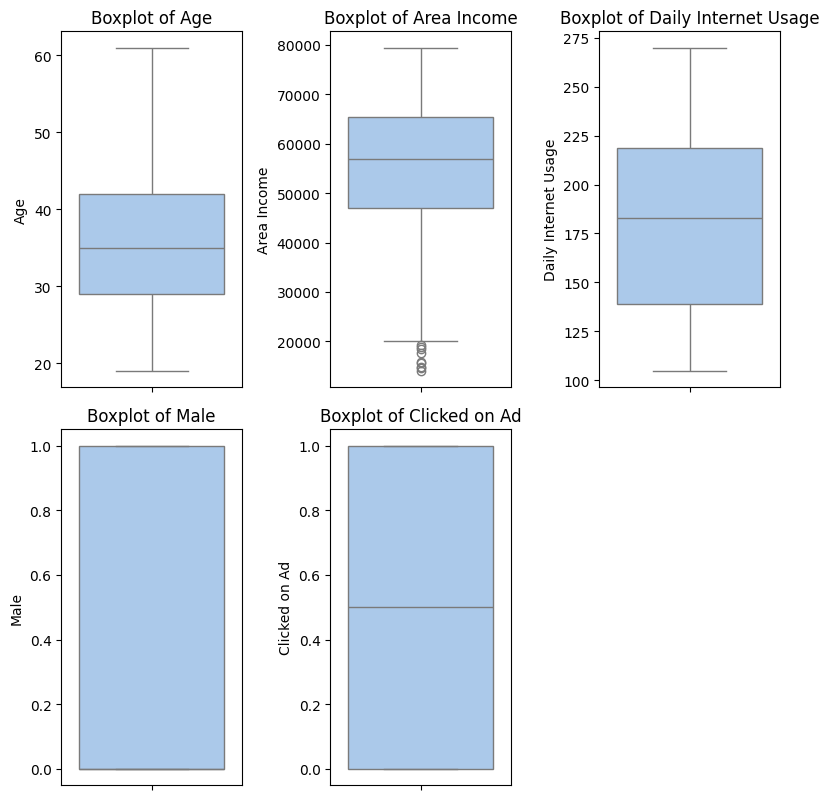

In [16]:
import warnings

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Chọn các cột số trong dữ liệu
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Tạo boxplot
plt.figure(figsize=(8, 4 * ((len(numeric_columns) - 1) + 1)))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) - 1) + 1, 3, i)
    sns.boxplot(y=data[column], palette='pastel')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

<h2 style="color: #4CAF50; font-size: 20px;">Biểu đồ hộp về Tuổi (Age)</h2>

<p style="color: #333333; font-size: 16px;">
    <strong>Độ tuổi tập trung:</strong> Độ tuổi của mẫu dữ liệu tập trung chủ yếu ở khoảng giữa <span style="color: #1E90FF;">40 và 50 tuổi</span>.
    <br><br>
    <strong >Không có giá trị ngoại lai:</strong> Không có các giá trị quá lớn hoặc quá nhỏ so với phần lớn dữ liệu, cho thấy độ tuổi trong mẫu khá đồng đều.
</p>

<h2 style="color: #4CAF50; font-size: 20px;">Biểu đồ hộp về Thu nhập khu vực (Area Income)</h2>
<p style="color: #333333; font-size: 16px;">
    <strong>Phân bố thu nhập:</strong> Thu nhập của các khu vực trong mẫu dữ liệu có sự phân hóa khá rõ rệt.
    <br><br>
    <strong>Giá trị ngoại lai:</strong> Có một số khu vực có thu nhập thấp hơn đáng kể so với phần lớn các khu vực khác, thể hiện dưới dạng các điểm dữ liệu nằm ngoài các râu của biểu đồ hộp.
</p>

<h2 style="color: #4CAF50; font-size: 20px;">Biểu đồ hộp về Sử dụng Internet hàng ngày (Daily Internet Usage)</h2>
<p style="color: #333333; font-size: 16px;">
    <strong>Mức độ sử dụng:</strong> Trung bình, người dùng trong mẫu sử dụng Internet khoảng <span style="color: #1E90FF;">200 phút mỗi ngày</span>.
    <br><br>
    <strong ;">Sự đồng đều:</strong> Mức độ sử dụng Internet tương đối đồng đều giữa các cá nhân, không có quá nhiều sự khác biệt lớn.
</p>

<h2 style="color: #4CAF50; font-size: 20px;">Biểu đồ hộp về Giới tính (Male) và Nhấp vào quảng cáo (Clicked on Ad)</h2>
<p style="color: #333333; font-size: 16px;">
    <strong>Phân bố giới tính:</strong> Tỷ lệ nam giới trong mẫu dữ liệu khá cao, gần như chiếm toàn bộ.
    <br><br>
    <strong>Tỷ lệ nhấp vào quảng cáo:</strong> Hầu hết các cá nhân trong mẫu đã nhấp vào quảng cáo.
</p>


In [17]:
#Function for print value outliers of each method
def print_outliers_detail(data, outliers_dict, method_name):
    print(f"\n{'='*50}")
    print(f"{method_name} Method Outliers Detail:")
    print(f"{'='*50}")
    
    for column in outliers_dict:
        print(f"\nColumn: {column}")
        print(f"Number of outliers: {len(outliers_dict[column])}")
        print("-"*30)
        print("Outlier values:")
        
        # Get the outlier values
        outlier_values = data.loc[outliers_dict[column], column]
        
        # Create a DataFrame with index and values
        outliers_data = pd.DataFrame({
            'Index': outlier_values.index,
            'Value': outlier_values.values
        })
        
        # Sort by value to see most extreme outliers first
        outliers_data = outliers_data.sort_values('Value', ascending=False)
        
        # Print with some formatting
        print(outliers_data.to_string())
        
        
# Function for detect outliers using Z-score and IQR
def detect_outliers_zscore(data, columns, threshold=3):
    """Detect outliers using Z-score method"""
    outliers_dict = {}
    for column in columns:
        z_scores = stats.zscore(data[column])
        outliers_dict[column] = data[abs(z_scores) > threshold].index
    return outliers_dict

def detect_outliers_iqr(data, columns):
    """Detect outliers using IQR method"""
    outliers_dict = {}
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_dict[column] = data[(data[column] < lower_bound) | 
                                 (data[column] > upper_bound)].index
    return outliers_dict

In [18]:
# Call function detect outliers
# Using Z-score
zscore_outliers = detect_outliers_zscore(data, numeric_columns)
print("Outliers detected by Z-score method:")
for col in zscore_outliers:
    print(f"{col}: {len(zscore_outliers[col])} outliers")

# Using IQR method
iqr_outliers = detect_outliers_iqr(data, numeric_columns)
print("\nOutliers detected by IQR method:")
for col in iqr_outliers:
    print(f"{col}: {len(iqr_outliers[col])} outliers")
    
print_outliers_detail(data, zscore_outliers, "Z-Score")
print_outliers_detail(data, iqr_outliers, "IQR")

Outliers detected by Z-score method:
Age: 0 outliers
Area Income: 3 outliers
Daily Internet Usage: 0 outliers
Male: 0 outliers
Clicked on Ad: 0 outliers

Outliers detected by IQR method:
Age: 0 outliers
Area Income: 9 outliers
Daily Internet Usage: 0 outliers
Male: 0 outliers
Clicked on Ad: 0 outliers

Z-Score Method Outliers Detail:

Column: Age
Number of outliers: 0
------------------------------
Outlier values:
Empty DataFrame
Columns: [Index, Value]
Index: []

Column: Area Income
Number of outliers: 3
------------------------------
Outlier values:
   Index     Value
2  52.67  14775.50
0  66.26  14548.06
1  68.58  13996.50

Column: Daily Internet Usage
Number of outliers: 0
------------------------------
Outlier values:
Empty DataFrame
Columns: [Index, Value]
Index: []

Column: Male
Number of outliers: 0
------------------------------
Outlier values:
Empty DataFrame
Columns: [Index, Value]
Index: []

Column: Clicked on Ad
Number of outliers: 0
------------------------------
Outlier 

<h2 style="color: #4CAF50; font-size: 20px;">Phương pháp Z-score:</h2>
<p style="color: #333333; font-size: 16px;">
    <strong>Age:</strong> Không phát hiện giá trị ngoại lai.
    <br>
    <strong>Area Income_1:</strong> Phát hiện <span style="color: #1E90FF;">3 giá trị ngoại lai</span>.
    <br>
    <strong>Daily Internet Usage_2:</strong> Không phát hiện giá trị ngoại lai.
    <br>
    <strong>Male_5:</strong> Không phát hiện giá trị ngoại lai.
    <br>
    <strong>Clicked on Ad_8:</strong> Không phát hiện giá trị ngoại lai.
</p>

<h2 style="color: #4CAF50; font-size: 20px;">Phương pháp IQR (Interquartile Range):</h2>
<p style="color: #333333; font-size: 16px;">
    <strong>Age:</strong> Không phát hiện giá trị ngoại lai.
    <br>
    <strong>Area Income_1:</strong> Phát hiện <span style="color: #1E90FF;">9 giá trị ngoại lai</span>.
    <br>
    <strong>Daily Internet Usage_2:</strong> Không phát hiện giá trị ngoại lai.
    <br>
    <strong>Male_5:</strong> Không phát hiện giá trị ngoại lai.
    <br>
    <strong>Clicked on Ad_8:</strong> Không phát hiện giá trị ngoại lai.
</p>

<h2 style="color: #4CAF50; font-size: 20px;">Nhận xét tổng quan:</h2>
<p style="color: #333333; font-size: 16px;">
    <strong>Age, Daily Internet Usage_2, Male_5, và Clicked on Ad_8</strong> không có giá trị ngoại lai trong cả hai phương pháp Z-score và IQR.
    <br>
    <strong>Area Income_1</strong> có một số giá trị ngoại lai, với <span style="color: #1E90FF;">3 giá trị phát hiện qua phương pháp Z-score</span> và <span style="color: #1E90FF;">9 giá trị phát hiện qua phương pháp IQR</span>. Điều này có thể chỉ ra rằng một số cá thể trong dữ liệu có thu nhập quá cao hoặc thấp so với phần lớn dữ liệu.
</p>


In [20]:
# Handling Outliers
def handle_outliers(data, outliers_dict, method='remove'):
    """Handle outliers by either removing or capping them"""
    data_cleaned = data.copy()
    
    if method == 'remove':
        # Get unique indices of all outliers
        all_outliers = set()
        for col_outliers in outliers_dict.values():
            all_outliers.update(col_outliers)
        data_cleaned = data_cleaned.drop(index=list(all_outliers))
        
    elif method == 'cap':
        for column in outliers_dict:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            data_cleaned[column] = data_cleaned[column].clip(lower=lower_bound, upper=upper_bound)
    
    return data_cleaned

# Create two versions of each method about cleaned data
data_removed_zscore = handle_outliers(data, zscore_outliers, method='remove')
data_capped_zscore = handle_outliers(data, zscore_outliers, method='cap')

data_removed_iqr = handle_outliers(data, iqr_outliers, method='remove')
data_capped_iqr = handle_outliers(data, iqr_outliers, method='cap')

print("Original shape:", data.shape)
print("Shape if using Z-score method after removing outliers:", data_removed_zscore.shape)
print("Shape if using Z-score method after capping outliers:", data_capped_zscore.shape)

print("Shape if using IQR method after removing outliers:", data_removed_iqr.shape)
print("Shape if using IQR method after capping outliers:", data_capped_iqr.shape)

Original shape: (1000, 9)
Shape if using Z-score method after removing outliers: (997, 9)
Shape if using Z-score method after capping outliers: (1000, 9)
Shape if using IQR method after removing outliers: (991, 9)
Shape if using IQR method after capping outliers: (1000, 9)


<h2 style="color: #4CAF50; font-size: 20px;">Sử dụng phương pháp Z-score:</h2>
<p style="color: #333333; font-size: 16px;">
    <strong>Sau khi loại bỏ các giá trị ngoại lai:</strong> Dữ liệu còn lại có hình dạng <span style="color: #1E90FF;">(997, 9)</span>, tức là đã loại bỏ <span style="color: #1E90FF;">3 bản ghi</span> có giá trị ngoại lai.
    <br>
    <strong>Sau khi giới hạn (capping) các giá trị ngoại lai:</strong> Dữ liệu không thay đổi, vẫn giữ nguyên hình dạng <span style="color: #1E90FF;">(1000, 9)</span>, tức là các giá trị ngoại lai được thay đổi về mức giá trị hợp lý, không làm mất đi bất kỳ bản ghi nào.
</p>

<h2 style="color: #4CAF50; font-size: 20px;">Sử dụng phương pháp IQR:</h2>
<p style="color: #333333; font-size: 16px;">
    <strong>Sau khi loại bỏ các giá trị ngoại lai:</strong> Dữ liệu còn lại có hình dạng <span style="color: #1E90FF;">(991, 9)</span>, tức là đã loại bỏ <span style="color: #1E90FF;">9 bản ghi</span> có giá trị ngoại lai.
    <br>
    <strong>Sau khi giới hạn (capping) các giá trị ngoại lai:</strong> Dữ liệu không thay đổi, vẫn giữ nguyên hình dạng <span style="color: #1E90FF;">(1000, 9)</span>, tức là các giá trị ngoại lai được điều chỉnh, không có bản ghi nào bị loại bỏ.
</p>


In [21]:
print(data.columns)

Index(['Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City',
       'Male', 'Country', 'Timestamp', 'Clicked on Ad'],
      dtype='object')


In [22]:
data_removed_iqr.rename(columns={
    'Area Income_1': 'Area Income',
    'Daily Internet Usage_2': 'Daily Internet Usage',
    'Ad Topic Line_3': 'Ad Topic Line',
    'City_4': 'City',
    'Male_5': 'Male',
    'Country_6': 'Country',
    'Timestamp_7': 'Timestamp',
    'Clicked on Ad_8': 'Clicked on Ad'
}, inplace=True)
print(data_removed_iqr.columns)


Index(['Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City',
       'Male', 'Country', 'Timestamp', 'Clicked on Ad'],
      dtype='object')


Plot if using Z-score method after capping outliers:


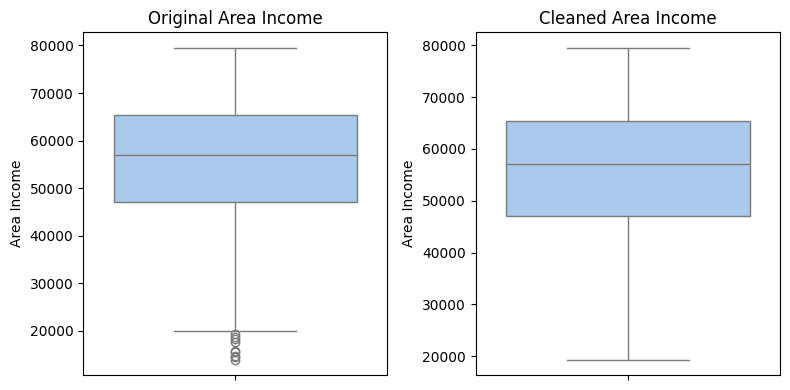

Plot if using Z-score method after removing outliers:


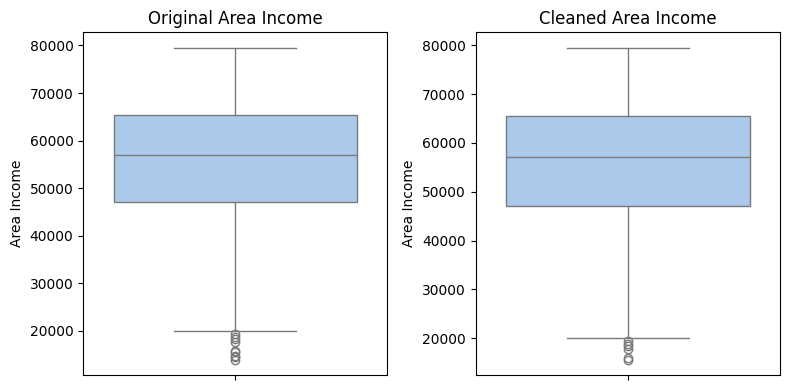

Plot if using IQR method after capping outliers:


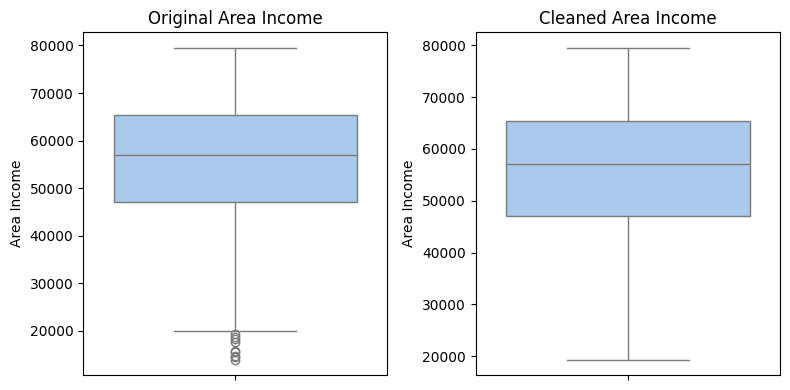

Plot if using IQR method after removine outliers:


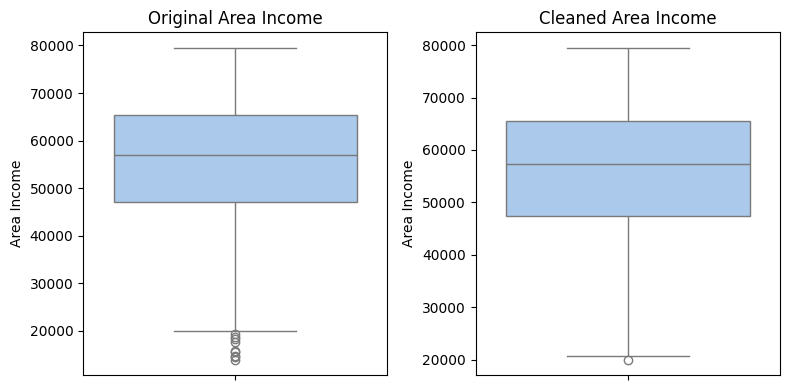

In [23]:
import warnings

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Visualize the results
def plot_comparison(original_df, cleaned_df, column):
    """Compare distributions before and after cleaning"""
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(y=original_df[column], palette='pastel')
    plt.title(f'Original {column}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=cleaned_df[column], palette='pastel')
    plt.title(f'Cleaned {column}')
    
    plt.tight_layout()
    plt.show()

# Compare distributions for each numeric column
print("Plot if using Z-score method after capping outliers:")
plot_comparison(data, data_capped_zscore, column = "Area Income")
    
print("Plot if using Z-score method after removing outliers:")
plot_comparison(data, data_removed_zscore, column = "Area Income")
    
print("Plot if using IQR method after capping outliers:")
plot_comparison(data, data_capped_iqr, column = "Area Income")
    
print("Plot if using IQR method after removine outliers:")
plot_comparison(data, data_removed_iqr, column = "Area Income")

In [24]:
second_cleaned_data = data_capped_iqr  

<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Nhận xét:</strong>
</div>
<p style="font-size: 16px; color: #555555;">
  Sau khi dùng Z-score và IQR để xác định Outliers, ta có thể thấy rằng Outliers chỉ tồn tại ở cột <strong>Area Income</strong>, vì thế ta tiến hành xử lý trên cột <strong>Area Income</strong> bằng phương pháp <strong>capping</strong> và <strong>removing</strong>
</p>
<p style="font-size: 16px; color: #555555;">
  Ta có thể thấy với cả 2 phương pháp loại bỏ Outliers bằng Z-score hoặc IQR, nếu chúng ta thực hiện capping thay vì removing thì số lượng giá trị Outliers sẽ được xử lý triệt để hơn.
</p>


## <span style="background-color: #D3D3D3; font-weight: bold;">5. Incorrect Types</span>

In [25]:
print(second_cleaned_data.dtypes)

# Identify columns with potential type mismatches
def detect_type_issues(df):
    type_issues = {}
    for column in df.columns:
        try:
            # Try to infer and convert
            test_conversion = pd.to_numeric(df[column], errors='raise')
        except (ValueError, TypeError):
            type_issues[column] = df[column].dtype
    return type_issues

Age                            float64
Area Income                    float64
Daily Internet Usage           float64
Ad Topic Line                   object
City                            object
Male                             int64
Country                         object
Timestamp               datetime64[ns]
Clicked on Ad                    int64
dtype: object


- Format type of Timestamp column to "dd/mm/yyyy hh:mm"

In [26]:
def convert_to_custom_format(date_series):
    """
    Convert date series to dd/mm/yyyy hh:mm format
    
    Handles multiple input formats:
    - Various datetime strings
    - Timestamp objects
    - Different date representations
    """
    try:
        # Convert to datetime first, handling various input formats
        converted_dates = pd.to_datetime(
            date_series, 
            errors='coerce',  # Convert invalid dates to NaT
            dayfirst=True,  # Prioritize day-first formats
            yearfirst=False
        )
        
        # Format to desired output
        return converted_dates.dt.strftime('%d/%m/%Y %H:%M')
    
    except Exception as e:
        print(f"Conversion error: {e}")
        return date_series

# Apply the conversion
second_cleaned_data['Timestamp'] = convert_to_custom_format(second_cleaned_data['Timestamp'])

In [27]:
# Convert the 'Timestamp' column to datetime dtype
second_cleaned_data['Timestamp'] = pd.to_datetime(second_cleaned_data['Timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')

In [28]:
print(second_cleaned_data['Timestamp'].head())
second_cleaned_data['Timestamp'] = convert_to_custom_format(second_cleaned_data['Timestamp'])
print(second_cleaned_data['Timestamp'].head())

Daily Time Spent on Site
68.95   2016-03-27 00:53:00
80.23   2016-04-04 01:39:00
69.47   2016-03-13 20:35:00
74.15   2016-01-10 02:31:00
68.37   2016-06-03 03:36:00
Name: Timestamp, dtype: datetime64[ns]
Daily Time Spent on Site
68.95    27/03/2016 00:53
80.23    04/04/2016 01:39
69.47    13/03/2016 20:35
74.15    10/01/2016 02:31
68.37    03/06/2016 03:36
Name: Timestamp, dtype: object


In [29]:
print("Some top rows of the cleaned data after format Timestamp column:")
second_cleaned_data.head(10)

Some top rows of the cleaned data after format Timestamp column:


,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
Daily Time Spent on Site,,,,,,,,,
68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 00:53,0
80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 01:39,0
69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 02:31,0
68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 03:36,0
59.99,23.0,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,19/05/2016 14:30,0
88.91,33.0,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,28/01/2016 20:59,0
66.00,48.0,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,07/03/2016 01:40,1
74.53,30.0,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,18/04/2016 09:33,0


<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Nhận xét:</strong>
</div>

<p style="font-size: 16px; color: #555555;">
  Định dạng của cột <strong>Timestamp</strong> đã được đưa về dạng <strong>"dd/mm/yyyy hh:mm"</strong> sau đó dùng hàm <strong>to_datetime</strong> của thư viện <strong>pandas</strong> để thay đổi kiểu dữ liệu của cột <strong>Timestamp</strong> nhằm mục đích dễ dàng phục vụ cho việc truy xuất dữ li
</p>


# <span style="background-color: #D3D3D3; font-weight: bold;">III. Visualise</span>



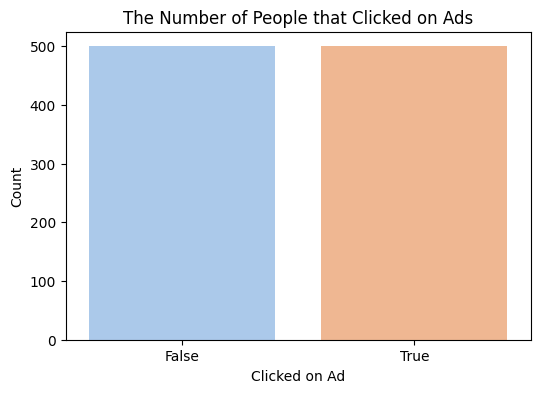

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Clicked on Ad', data=second_cleaned_data, palette='pastel')

plt.title("The Number of People that Clicked on Ads")
plt.xlabel("Clicked on Ad")
plt.xticks([0, 1], ('False', 'True'))
plt.ylabel("Count")
plt.show()

<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Nhận xét:</strong>
<p style="color: #333333; font-size: 16px;">
    Biểu đồ cột cho thấy sự so sánh giữa số lượng người dùng <strong>đã nhấp vào quảng cáo</strong> và <strong>chưa nhấp vào quảng cáo</strong>.
    <br>
    Có thể thấy rằng dữ liệu về việc người dùng nhấp vào quảng cáo có tỷ lệ <strong>xấp xỉ 50/50</strong>.
</p>


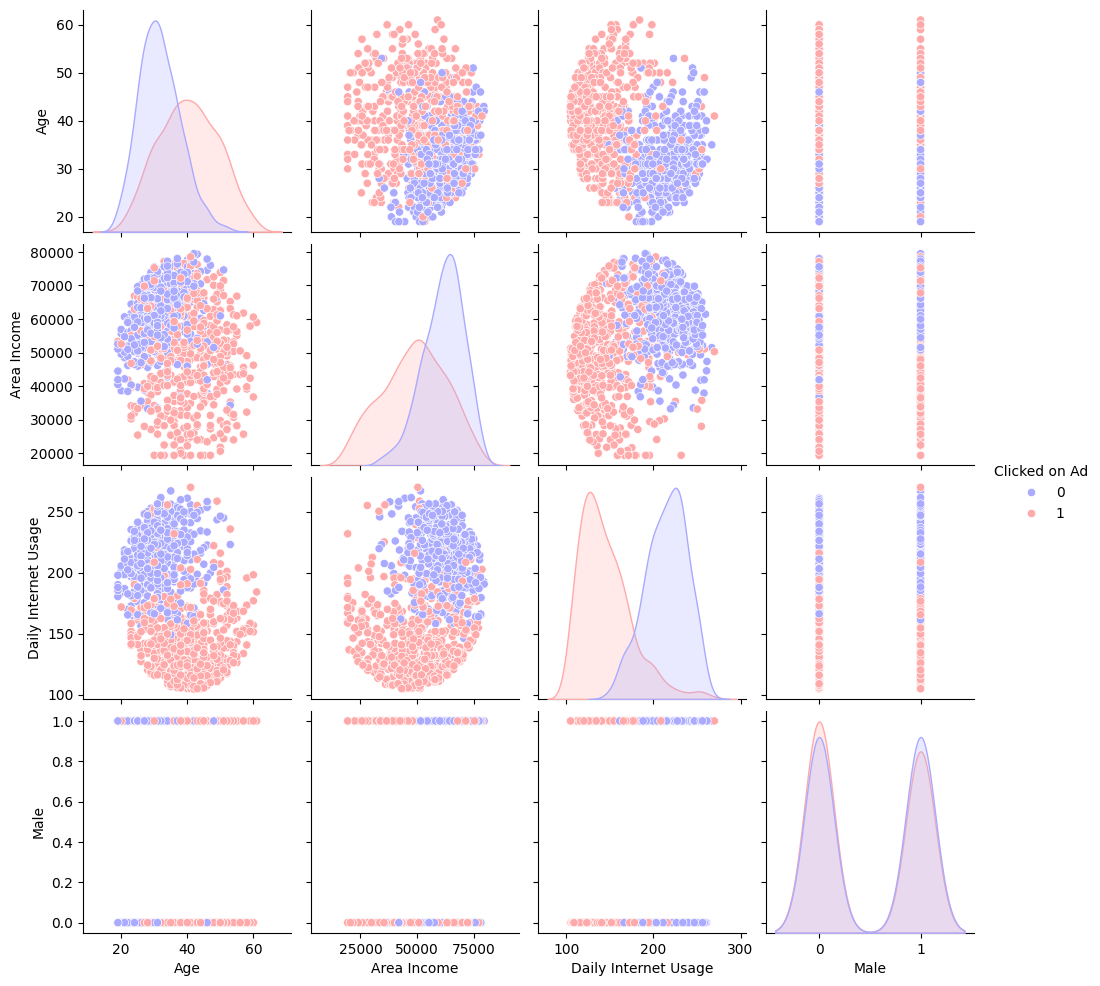

In [32]:

sns.pairplot(second_cleaned_data,hue='Clicked on Ad',palette='bwr')

<h2 style="color: #4CAF50; font-size: 20px;">Nhận xét:</h2>
<p style="color: #333333; font-size: 16px;">
</p>
    Biểu đồ này cung cấp sự khác biệt rõ rệt giữa những người nhấp vào quảng cáo và những người không nhấp. Các biến không có mối tương quan với nhau. Mỗi phân phối đơn biến cho thấy sự khác biệt rõ ràng về độ nhọn (kurtosis) và trung bình giữa hai nhóm. Các biểu đồ cặp cũng chỉ ra sự phân nhóm rõ rệt giữa hai nhóm này. Những người không nhấp vào quảng cáo có xu hướng tuân theo các mô hình rõ ràng hơn, trong khi những người nhấp vào quảng cáo có sự phân tán ít hơn. Các giá trị độ nhọn cao hơn có thể liên quan đến nhóm không nhấp vào quảng cáo, điều này cần được xác nhận qua phân tích định lượng.
</p>
    <strong>Tuổi và Thu nhập khu vực:</strong> Có vẻ như có một mối tương quan dương nhẹ giữa tuổi và thu nhập khu vực, nghĩa là khi tuổi tăng thì thu nhập cũng có xu hướng tăng. Tuy nhiên, mối quan hệ này không quá rõ ràng và có thể có nhiều yếu tố khác ảnh hưởng.
    <br><br>
    <strong>Tuổi và Thời gian sử dụng internet hàng ngày:</strong> Không có mối liên hệ rõ ràng giữa tuổi và thời gian sử dụng internet hàng ngày.
    <br><br>
    <strong>Thu nhập khu vực và Thời gian sử dụng internet hàng ngày:</strong> Có thể có một mối tương quan dương nhẹ giữa thu nhập khu vực và thời gian sử dụng internet hàng ngày. Tuy nhiên, cần phân tích sâu hơn để khẳng định điều này.
    <br><br>
    <strong>Giới tính:</strong> Biểu đồ cho thấy dữ liệu chủ yếu tập trung vào giới tính nam, điều này có thể ảnh hưởng đến kết quả phân tích.
</p>


Tạo bản đồ nhiệt để trực quan hóa mối tương quan giữa các cột số trong Data.

<Axes: >

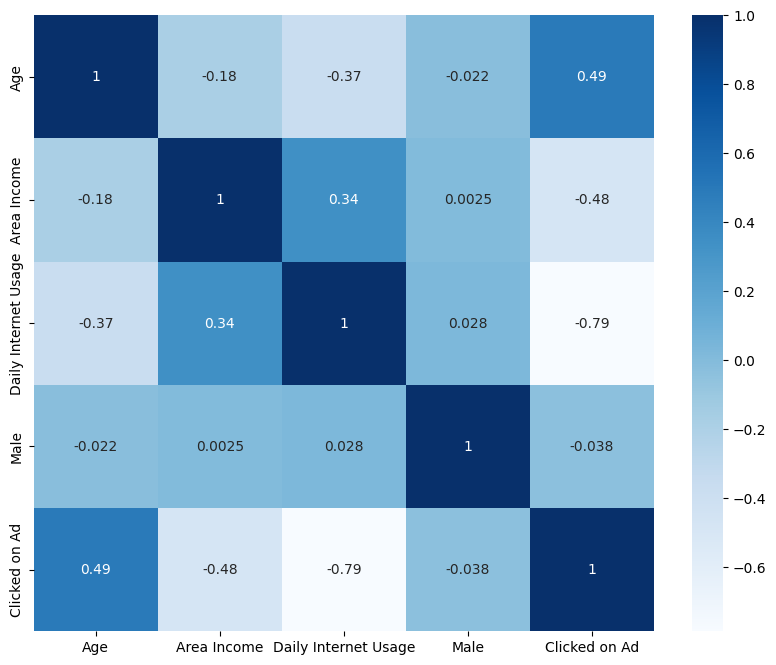

In [33]:
fig = plt.figure(figsize = (10,8))
sns.heatmap(second_cleaned_data.select_dtypes(include=['number']).corr(), cmap='Blues', annot = True)

<h2 style="color: #4CAF50; font-size: 20px;">Nhận xét chi tiết:</h2>
<p style="color: #333333; font-size: 16px;">
    <strong>Mối quan hệ dương:</strong> Các ô có màu xanh đậm thể hiện mối quan hệ dương mạnh giữa hai biến. Điều này có nghĩa là khi giá trị của một biến tăng, giá trị của biến kia cũng có xu hướng tăng.
</p>
<p style="color: #333333; font-size: 16px;">
    <strong>Mối quan hệ âm:</strong> Các ô có màu xanh nhạt hoặc trắng thể hiện mối quan hệ âm hoặc không có mối quan hệ. Điều này có nghĩa là khi giá trị của một biến tăng, giá trị của biến kia có xu hướng giảm hoặc không có sự thay đổi đáng kể.
</p>
<p style="color: #333333; font-size: 16px;">
    <strong>Các điểm đáng chú ý:</strong>
    <ul style="color: #333333; font-size: 16px;">
        <li><strong>Tuổi và Click:</strong> Mối quan hệ dương giữa tuổi và việc nhấp vào quảng cáo là đáng quan tâm. Điều này có thể gợi ý rằng các chiến dịch quảng cáo nên tập trung vào nhóm người dùng lớn tuổi hơn.</li>
        <li><strong>Thu nhập và Click:</strong> Mối quan hệ âm giữa thu nhập và việc nhấp vào quảng cáo là khá bất ngờ. Điều này có thể do nhiều yếu tố, chẳng hạn như người có thu nhập cao có thể ít quan tâm đến các sản phẩm được quảng cáo hoặc có những sở thích khác.</li>
        <li><strong>Giới tính và các biến khác:</strong> Biến "Male" (Giới tính) dường như không có mối quan hệ mạnh với các biến khác.</li>
    </ul>
</p>


## <span style="background-color: #D3D3D3; font-weight: bold;">6. Standardizing Data</span>

<p style="font-size: 16px; color: #555555;">
    Ta có thể thấy những cột có kiểu dữ liệu là object như Ad Topic Line, City, Country có vô số giá trị kiểu <strong>string</strong> tồn tại trên các cột này, tuy nhiên ta không thể sắp xếp một thứ tự nào rõ ràng dành cho các giá trị trên, đồng thời không có giá trị nào chiếm trọng số trong tất cả giá trị. Vì thế ta sữ dụng phương pháp <strong>Label Encoding
</p>

In [326]:
# Identify columns with object data type
object_columns = second_cleaned_data.select_dtypes(include=['object']).columns
print(object_columns)

# Apply label encoding to each object column and store the encoders
label_encoders = {}
for col in object_columns:
    le = LabelEncoder()
    second_cleaned_data[col] = le.fit_transform(second_cleaned_data[col])
    label_encoders[col] = le

#Print the standardizing data
print(second_cleaned_data.head(10))

print("Standardizing completed.")

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')
    Age  Area Income  Daily Internet Usage  Ad Topic Line  City  Male  \
0  35.0     61833.90                256.09             91   961     0   
1  31.0     68441.85                193.77            464   903     1   
2  26.0     59785.94                236.50            566   111     0   
3  29.0     54806.18                245.89            903   939     1   
4  35.0     73889.99                225.58            766   805     0   
5  23.0     59761.56                226.74            805   282     1   
6  33.0     53852.85                208.36            222    46     0   
7  48.0     24593.33                131.76            723   671     1   
8  30.0     68862.00                221.51            107   884     1   
9  20.0     55642.32                183.82            454   712     1   

   Country  Timestamp  Clicked on Ad  
0      215        871              0  
1      147        120              0  
2     

In [327]:
# Function to display original values and their corresponding labels
def display_label_mappings(encoders):
    for col, le in encoders.items():
        print(f"Column: {col}")
        for class_index, class_label in enumerate(le.classes_):
            print(f"  {class_index}: {class_label}")
        print()

# Display the label mappings
display_label_mappings(label_encoders)

Column: Ad Topic Line
  0: Adaptive 24hour Graphic Interface
  1: Adaptive asynchronous attitude
  2: Adaptive context-sensitive application
  3: Adaptive contextually-based methodology
  4: Adaptive demand-driven knowledgebase
  5: Adaptive uniform capability
  6: Advanced 24/7 productivity
  7: Advanced 5thgeneration capability
  8: Advanced didactic conglomeration
  9: Advanced disintermediate data-warehouse
  10: Advanced exuding conglomeration
  11: Advanced full-range migration
  12: Advanced heuristic firmware
  13: Advanced local task-force
  14: Advanced modular Local Area Network
  15: Advanced systemic productivity
  16: Advanced web-enabled standardization
  17: Ameliorated actuating workforce
  18: Ameliorated bandwidth-monitored contingency
  19: Ameliorated client-driven forecast
  20: Ameliorated coherent open architecture
  21: Ameliorated contextually-based collaboration
  22: Ameliorated discrete extranet
  23: Ameliorated exuding encryption
  24: Ameliorated exuding

In [328]:
print("\nInformation about the data structure:")
data.info()


Information about the data structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Age                   1000 non-null   float64       
 1   Area Income           1000 non-null   float64       
 2   Daily Internet Usage  1000 non-null   float64       
 3   Ad Topic Line         1000 non-null   object        
 4   City                  1000 non-null   object        
 5   Male                  1000 non-null   int64         
 6   Country               1000 non-null   object        
 7   Timestamp             1000 non-null   datetime64[ns]
 8   Clicked on Ad         1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 70.4+ KB


<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Nhận xét:</strong>
</div>
<p style="font-size: 16px; color: #555555;">
    Các cột có kiểu dữ liệu object đã được chuyển đổi thành các giá trị số nguyên. Điều này giúp dễ dàng hơn trong việc thực hiện các phân tích thống kê và mô hình hóa dữ liệu.
</p>
<p style="font-size: 16px; color: #555555;">
    Việc standardizing các cột object bằng <strong>Label Encoding</strong> giúp dữ liệu trở nên nhất quán, dễ xử lý và tương thích hơn với các mô hình học máy. Tuy nhiên, <strong>Label Encoding</strong> không giữ lại thông tin thứ tự giữa các giá trị, điều này có thể ảnh hưởng đến một số phân tích nhất định.
</p>